In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import re
import random
import time
import os

from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

# Clustering based on diagnosis

### Import data

In [2]:
# read only random sample of chunk with all selected cancers

#p = 0.3  # 30% of the lines
# keep the header, then take only 30% of lines

# if random from [0,1] interval is greater than 0.1 the row will be skipped
#chunk_all_sample = pd.read_csv(
#         "./Output/Chunk_AllCancers.csv",
#         header=0, 
#         skiprows=lambda i: i>0 and random.random() > p)

In [3]:
# load chunk with all selected cancers

chunk_all = pd.read_csv("./Output/Chunk_AllCancers.csv", index_col=0)
chunk_all.head()

,label,ENSG00000167578,ENSG00000078237,ENSG00000146083,ENSG00000158486,ENSG00000198242,ENSG00000134108,ENSG00000172137,ENSG00000276644,ENSG00000094963,...,ENSG00000107863,ENSG00000213782,ENSG00000146707,ENSG00000158417,ENSG00000089177,ENSG00000186115,ENSG00000009694,ENSG00000123685,ENSG00000105063,ENSG00000181518
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TCGA-C8-A1HL-01,1_breast,4.9782,2.6624,3.9580,-0.3752,10.7877,5.7415,0.6239,3.3450,-0.1993,...,3.2251,4.9016,2.4727,5.6511,5.1094,-9.9658,-6.5064,1.0293,4.4095,-9.9658
TCGA-EW-A2FS-01,1_breast,5.7035,1.2696,4.2189,-4.2934,10.1460,5.7801,1.4011,4.0532,2.3193,...,3.5863,4.9327,3.1556,5.8510,4.4277,-6.5064,-3.0469,1.4600,4.4081,-9.9658
TCGA-B6-A402-01,1_breast,4.1252,1.6234,5.0180,-2.8262,9.8935,4.8929,2.9729,-3.6259,6.0603,...,5.1107,5.3013,3.9801,5.8592,3.1669,-9.9658,-5.0116,2.5061,4.4490,-9.9658
TCGA-A2-A3XX-01,1_breast,4.8734,1.5998,4.1859,-2.1140,9.8904,4.7247,9.4821,-3.4580,5.2126,...,4.1676,5.1169,4.4223,5.7195,3.0393,-6.5064,-5.5735,2.0707,4.1078,-9.9658
TCGA-Z7-A8R5-01,1_breast,5.4973,1.3846,3.3017,-5.5735,11.1398,4.6651,3.2080,1.4600,2.8522,...,2.6114,4.7176,4.0875,3.6578,2.1509,-9.9658,-4.6082,2.8522,4.4900,-9.9658


## T-SNE clustering

In [13]:
def tsne(chunk, nlabels, random_state=1888, ncols=100, perplexity=30):
        """
        Create T-SNE graph using sample number of columns
        """
        
        # Defining Model
        model = TSNE(learning_rate=100, perplexity=perplexity)
        
        chunk_y = chunk["label"]
        chunk_100 = chunk.drop(columns="label").sample(ncols, axis=1, random_state=random_state)

        # Fitting Model
        transformed = model.fit_transform(chunk_100)

        # Plotting 2d T-Sne
        x_axis = transformed[:, 0]
        y_axis = transformed[:, 1]

        plt.figure(figsize=(16,7))
        ax = plt.subplot(1, 2, 1)
        sns.scatterplot(
            x=x_axis,
            y=y_axis,
            hue=chunk_y,
            palette=sns.color_palette("hls", nlabels),
            legend="full",
            alpha=0.3,
            ax=ax)

### T-SNE all cancers

#### Healthy & cancerous

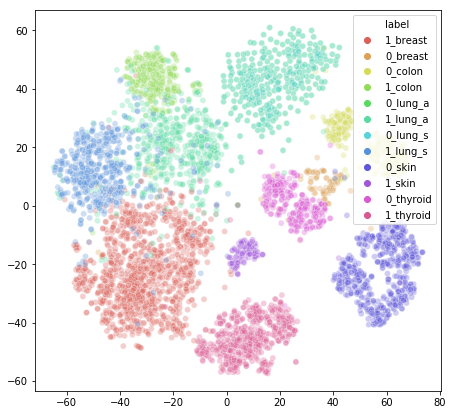

In [147]:
tsne(chunk_all, nlabels=12)

#### Cancerous only

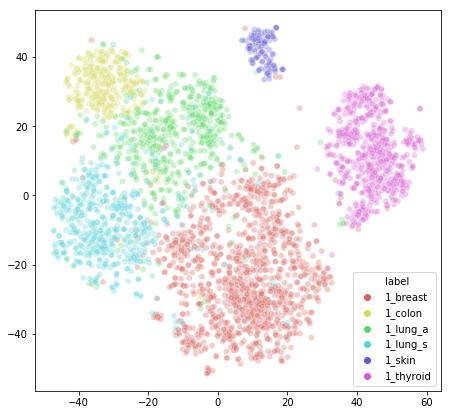

In [74]:
tsne(chunk_all[chunk_all["label"].str.startswith('1')], nlabels=6)

#### Healthy only

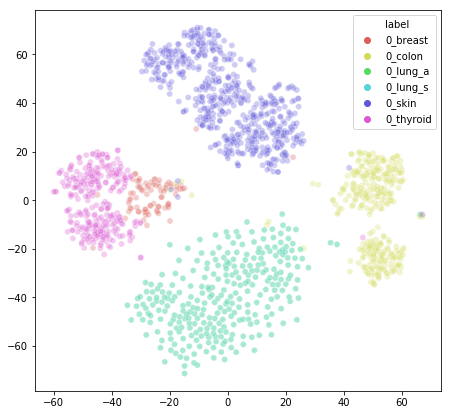

In [10]:
tsne(chunk_all[chunk_all["label"].str.startswith('0')], nlabels=6)

### T-SNE lung cancer

#### Healthy & Adenocarcinoma and Squamous Cell Carcinoma

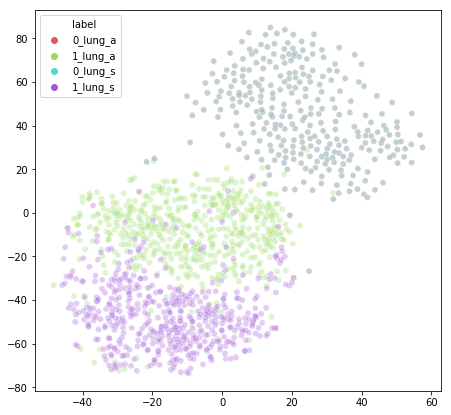

In [10]:
tsne(chunk_all[chunk_all["label"].str.contains('lung')], nlabels=4)

#### Healthy & Adenocarcinoma

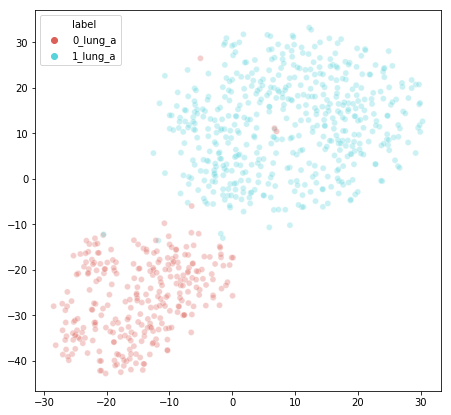

In [12]:
tsne(chunk_all[chunk_all["label"].str.contains('lung_a')], nlabels=2)

#### Cancerous only: Adenocarcinoma & Squamous Cell Carcinoma

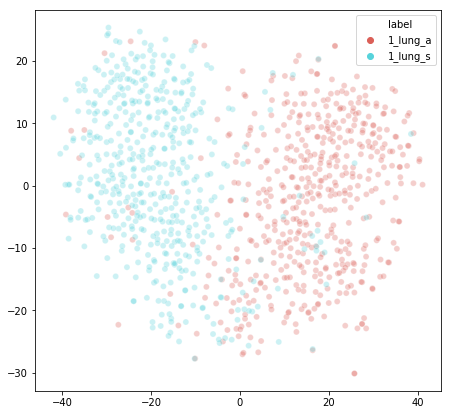

In [15]:
tsne(chunk_all[chunk_all["label"].str.contains("1_lung")], nlabels=2, ncols=150)

### T-SNE thyroid cancer

#### Healthy & cancerous

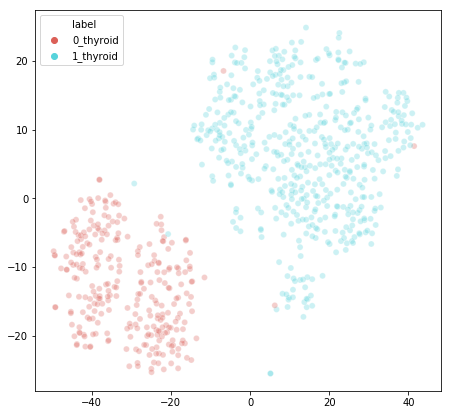

In [14]:
tsne(chunk_all[chunk_all["label"].str.contains("thyroid")], nlabels=2)

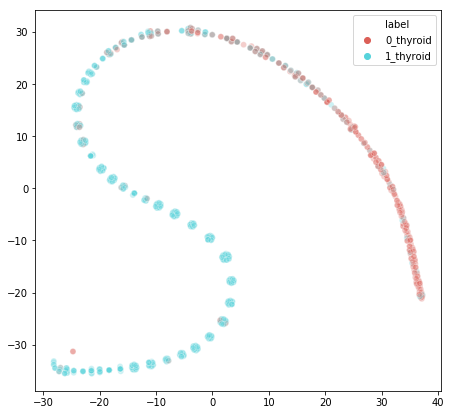

In [14]:
# art gallery

tsne(chunk_all[chunk_all["label"].str.contains("thyroid")], nlabels=2, ncols=1, random_state=58647364)

### T-SNE colon cancer

#### Healthy & cancerous

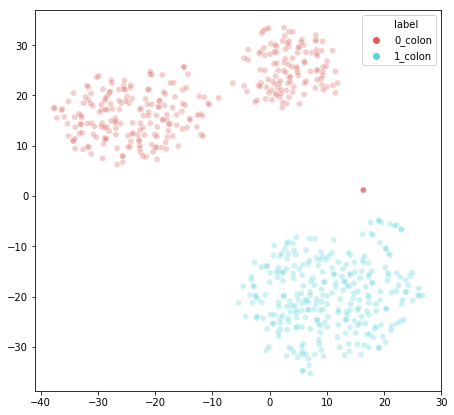

In [21]:
tsne(chunk_all[chunk_all["label"].str.contains("colon")], nlabels=2)

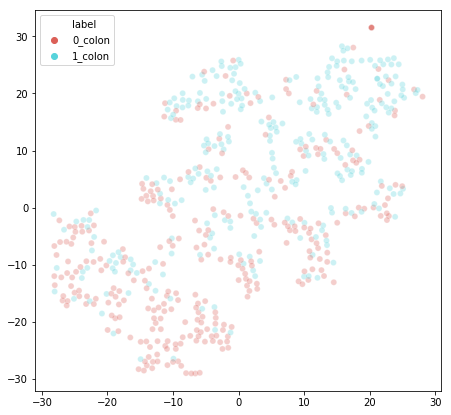

In [20]:
# art gallery

tsne(chunk_all[chunk_all["label"].str.contains("colon")], nlabels=2, ncols=2, random_state=87362)

### T-SNE breast cancer

#### Healthy & Cancerous

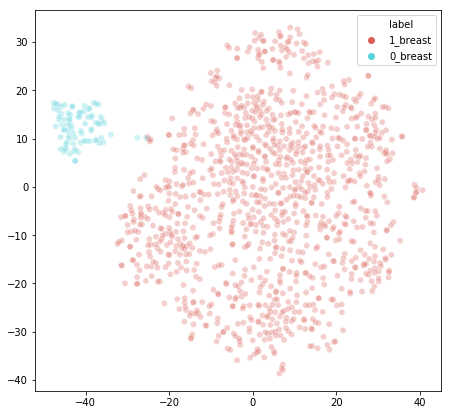

In [18]:
tsne(chunk_all[chunk_all["label"].str.contains("breast")], nlabels=2)

## Hierarchical clustering

#### Top genes for breast cancer

In [6]:
# top genes selected for breast cancer

breast_selected_genes = ['ENSG00000122304',
                  'ENSG00000203805',
                  'ENSG00000126368',
                  'ENSG00000136826',
                  'ENSG00000149451']

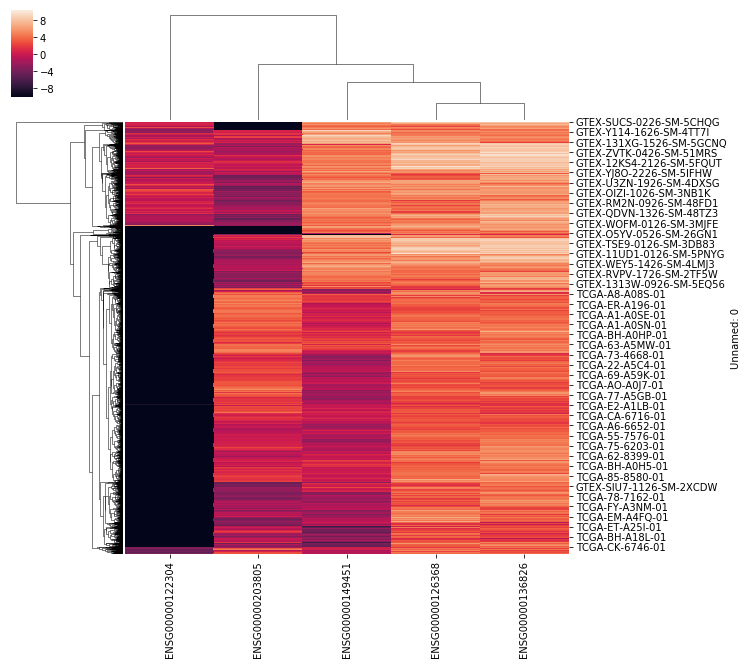

In [9]:
sns.clustermap(chunk_all[breast_selected_genes])
None

## PCA

In [37]:
def pca(chunk, col_to_drop, random_state=1888, n_components=3):
    """
    Create PCA graph using MinMaxScaler
    """

    # Defining x and y
    y = chunk[col_to_drop]
    X = chunk.drop(columns=col_to_drop)

    # Scaling
    minmax_scaler = MinMaxScaler()
    X_scaled = minmax_scaler.fit_transform(X)

    # Defining Model
    model = PCA(n_components=n_components)

    # Fitting Model
    transformed = model.fit_transform(X_scaled)

    # Printing explained variance
    print("Explained Variance Ratio:")
    print(model.explained_variance_ratio_)

    # Creating df with principal components and label
    pca_df = pd.DataFrame(data=transformed, columns=["component_1", "component_2", "component_3"])
    cancer_label = chunk[col_to_drop]

    pca_df.reset_index(drop=True, inplace=True)
    cancer_label.reset_index(drop=True, inplace=True)
    finalDf = pd.concat([pca_df, cancer_label], axis=1)

    # Plotting 2d PCA

    fig, ax = plt.subplots(figsize=(14,8))

    sns.scatterplot(x=finalDf["component_1"],
                    y=finalDf["component_2"],
                    data=finalDf,
                    hue=finalDf[col_to_drop],
                    ax=ax)
    plt.title('PC1 against PC2')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(loc='lower right')
    plt.show()

### PCA all cancers

#### Healthy & cancerous

Explained Variance Ratio:
[0.10728561 0.07849444 0.06686405]


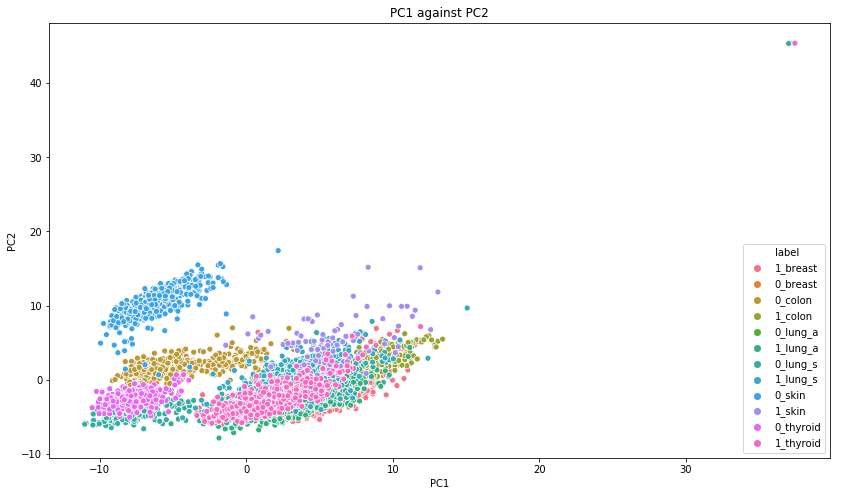

In [38]:
pca(chunk_all, "label")

#### Cancerous only

Explained Variance Ratio:
[0.10338101 0.09225079 0.05877974]


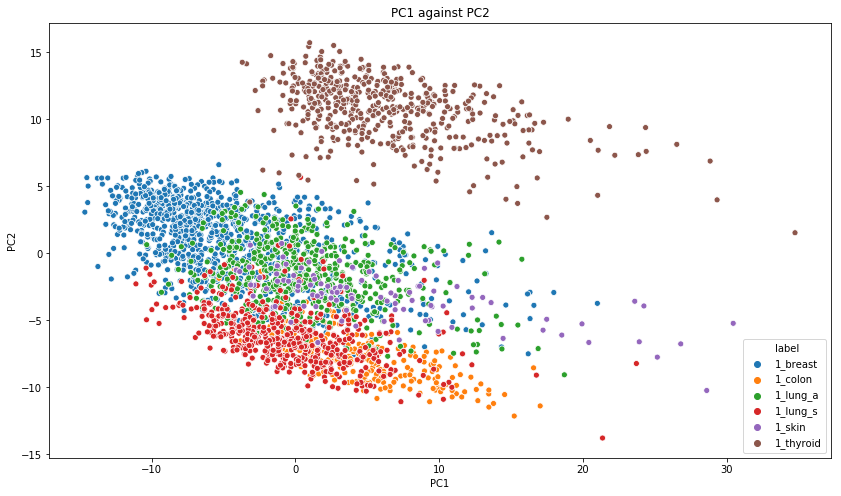

In [40]:
pca(chunk_all.reset_index().drop(columns=['Unnamed: 0'])[chunk_all["label"].str.startswith('1')], "label")

# Clustering based on genes

#### Creating smaller chunk with all genes and random samples

* using the smallest chunk as a base
* taking proportional number of healthy/cancerous samples from other chunks
* merging all chunk samples to one dataframe

In [15]:
def count_base(data):
    n = float('inf')
    
    for (path, _) in data:
        n = min(n, pd.read_csv(path, usecols=['label']).shape[0])

    return n

In [16]:
def filter_df(df):
    dfg = df.groupby(df["label"]).count()
    
    tcga_count = dfg.iloc[1, 0]
    gtex_count = dfg.iloc[0, 0]
    total_count = tcga_count + gtex_count

    return pd.concat([
        df[df['label'] == 1].sample(n=int(tcga_count * base_count / total_count)),
        df[df['label'] == 0].sample(n=int(gtex_count * base_count / total_count))
    ])

In [17]:
def create_merged_df(data):
    frames = []
    
    for (path, name) in data:
        print('Processing {} dataframe'.format(name))

        df = filter_df(pd.read_csv('./Output/Chunk_Skin.csv', index_col=0))
        df.columns = [(re.sub('\.\d+', '', gene)) for gene in df.columns]
        df.drop(columns=['label'], inplace=True)
        df.insert(loc=0, column='cancer', value=name)
        
        frames.append(df)

    print('Finished')
    return pd.concat(frames)

In [ ]:
items = [
    ("./Output/Chunk_Skin.csv", "skin"),
    ("./Output/Chunk_Breast.csv", "breast"),
    ("./Output/Chunk_Thyroid_ThyroidGland.csv", "thyr"),
    ("./Output/Chunk_Colon.csv", "colon"),
    ("./Output/Chunk_LungAdenocarcinoma_Lung.csv", "lungA"),
    ("./Output/Chunk_LungSquamousCellCarcinoma_Lung.csv", "lungS")   
]

base_count = count_base(items)
df = create_merged_df(items)
#df.to_csv('../Output/Chunk_AllCancer_Split_{}.csv'.format(base_count))

#### Filtering smaller chunk with top genes

In [18]:
df_genes = pd.read_csv('./Output/Chunk_AllCancer_Split_594.csv', index_col=0)
df_genes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3558 entries, TCGA-EB-A44P-01 to GTEX-ZDTT-0426-SM-4WKFL
Columns: 19664 entries, cancer to ENSG00000181518
dtypes: float64(19663), object(1)
memory usage: 533.8+ MB


In [49]:
df_genes.head()

,cancer,ENSG00000167578,ENSG00000078237,ENSG00000146083,ENSG00000158486,ENSG00000198242,ENSG00000134108,ENSG00000172137,ENSG00000276644,ENSG00000094963,...,ENSG00000107863,ENSG00000213782,ENSG00000146707,ENSG00000158417,ENSG00000089177,ENSG00000186115,ENSG00000009694,ENSG00000123685,ENSG00000105063,ENSG00000181518
TCGA-EB-A44P-01,skin,6.1433,4.3758,4.6871,-9.9658,10.0412,6.1299,-4.2934,-6.5064,-9.9658,...,3.8431,5.8210,3.6335,5.3754,3.2267,-9.9658,-9.9658,1.5661,5.7170,-9.9658
TCGA-EB-A431-01,skin,5.1437,4.2929,3.9002,-4.0350,10.0256,6.3646,-3.3076,-1.6394,-2.8262,...,3.8451,5.5659,4.6445,5.1627,2.1313,-9.9658,-6.5064,0.9716,6.5549,-9.9658
TCGA-EB-A5SF-01,skin,4.9007,2.0004,4.0679,-2.2447,9.8412,3.1701,4.7485,-4.6082,-1.1172,...,-0.0130,3.6428,3.6680,1.6093,-0.5973,-2.7274,-9.9658,0.3573,5.5308,-9.9658
TCGA-EB-A41A-01,skin,5.7337,2.6185,4.2847,-6.5064,10.2545,4.9584,-1.8836,-3.4580,-4.2934,...,4.2048,5.1563,4.6730,5.6651,2.0218,-9.9658,-4.0350,1.9452,5.1416,-9.9658
TCGA-XV-AAZW-01,skin,6.3684,3.2811,3.2511,-3.8160,10.4888,4.9416,2.1114,-5.5735,-1.2828,...,3.0002,4.9194,4.3206,4.5766,1.0711,-5.0116,-9.9658,1.0007,5.0879,-9.9658


In [50]:
final_genes = pd.read_csv("./Output/final_genes.csv", index_col=0)
final_genes.head()

,Gene,Shap_Importance,Cancer,Combination,SHAP_Combination
400,ENSG00000172425,0.755203,0_breast,0_breast,0.7552028894424438
361,ENSG00000078399,0.660586,0_breast,"0_breast, 0_colon, 1_colon, 1_thyroid","0.6605863571166992, 0.08027119934558868, 0.049..."
361,ENSG00000078399,0.080271,0_colon,"0_breast, 0_colon, 1_colon, 1_thyroid","0.6605863571166992, 0.08027119934558868, 0.049..."
361,ENSG00000078399,0.049252,1_colon,"0_breast, 0_colon, 1_colon, 1_thyroid","0.6605863571166992, 0.08027119934558868, 0.049..."
361,ENSG00000078399,0.099134,1_thyroid,"0_breast, 0_colon, 1_colon, 1_thyroid","0.6605863571166992, 0.08027119934558868, 0.049..."


In [137]:
top_genes = final_genes["Gene"].values.tolist()

final_genes_filtered = df_genes[top_genes + ["cancer"]]
final_genes_filtered.head(2)

,ENSG00000172425,ENSG00000078399,ENSG00000078399,ENSG00000078399,ENSG00000078399,ENSG00000154263,ENSG00000154263,ENSG00000186832,ENSG00000101280,ENSG00000124935,...,ENSG00000008710,ENSG00000115705,ENSG00000115705,ENSG00000115705,ENSG00000115705,ENSG00000160867,ENSG00000160867,ENSG00000103168,ENSG00000103168,cancer
TCGA-EB-A44P-01,-1.5951,-0.5125,-0.5125,-0.5125,-0.5125,-0.0877,-0.0877,5.9143,-9.9658,-1.7322,...,5.5100,-6.5064,-6.5064,-6.5064,-6.5064,0.9038,0.9038,5.2895,5.2895,skin
TCGA-EB-A431-01,-4.6082,-2.5479,-2.5479,-2.5479,-2.5479,-1.9942,-1.9942,0.4447,-9.9658,2.2113,...,4.5814,-4.2934,-4.2934,-4.2934,-4.2934,2.0430,2.0430,4.5946,4.5946,skin


In [138]:
final_genes_filtered.rename(columns={"cancer": "label"}, inplace=True)

### T-SNE with top genes

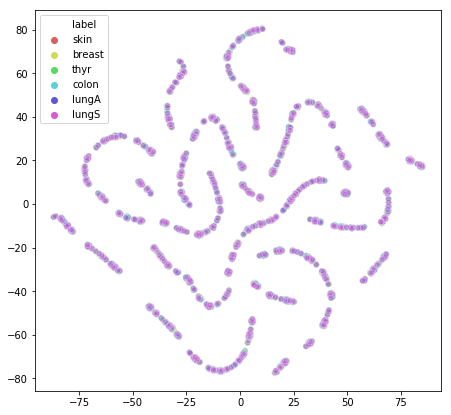

In [77]:
tsne(final_genes_filtered, nlabels=6, ncols=None)

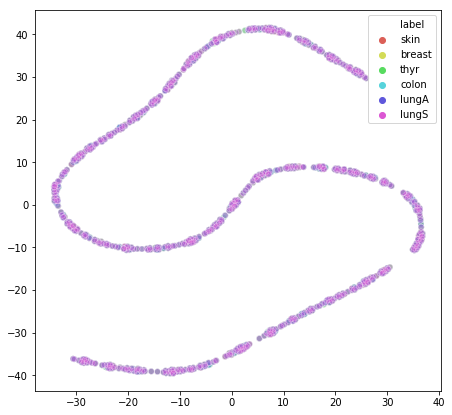

In [78]:
# trying different perplexity

tsne(final_genes_filtered, nlabels=6, ncols=None, perplexity=100)

### PCA with top genes

Explained Variance Ratio:
[0.44992798 0.13173907 0.05847783]


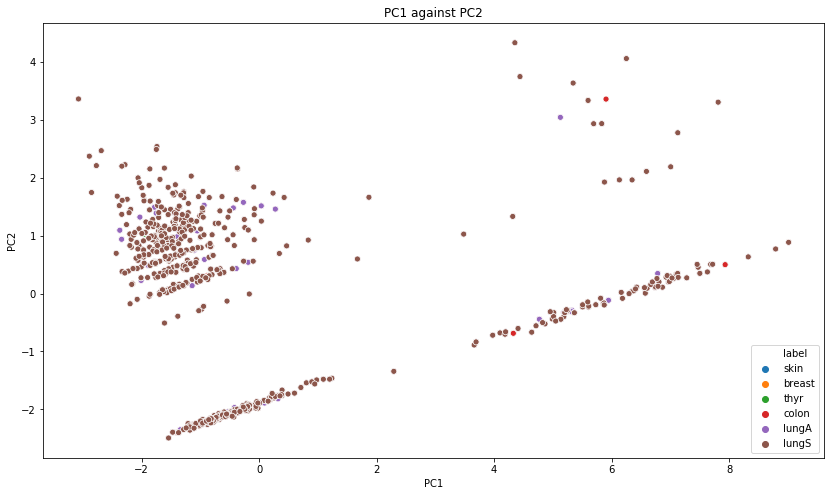

In [81]:
pca(final_genes_filtered, col_to_drop="label")

### T-SNE after PCA with top genes

In [85]:
def tsne_from_pca(df, random_state=1888, ncols=500, n_components=50, perplexity=40):
        """
            Create T-SNE graph after performing PCA
        """
        # PCA part
    
        # Defining x and y
        df_y = df["label"]
        df_x_sample = df.drop(columns="label") #.sample(ncols, axis=1, random_state=random_state)
        
        # Scaling
        minmax_scaler = MinMaxScaler()
        X_scaled = minmax_scaler.fit_transform(df_x_sample)
        
        # Defining Model
        model = PCA(n_components=n_components)

        # Fitting Model
        transformed = model.fit_transform(X_scaled)
        
        # Printing explained variance
        #print(model.explained_variance_ratio_)
    
        # T-SNE part
    
        # T-SNE model
        tsne = TSNE(n_components=2, verbose=0, perplexity=perplexity, n_iter=300)
        tsne_pca_results = tsne.fit_transform(transformed)
    
        # Plotting 2d t-Sne
        x_axis = tsne_pca_results[:, 0]
        y_axis = tsne_pca_results[:, 1]

        plt.figure(figsize=(16,7))
        ax1 = plt.subplot(1, 2, 1)
        sns.scatterplot(
            x=x_axis, y=y_axis,
            hue=df_y,
            palette=sns.color_palette("hls"),
            legend="full",
            alpha=0.3,
            ax=ax1)

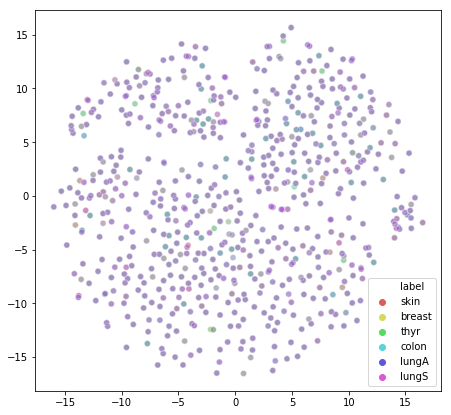

In [87]:
tsne_from_pca(final_genes_filtered, ncols=None)

# Survival Data

* OS, overall survival
* PFI, progression-free interval
* DFI, disease-free interval * DSS, disease-specific survival

#### Cleaning data

In [139]:
df_survival = pd.read_csv("Data/TCGA_survival_data.txt", delimiter="\t")

In [140]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns with missing values.")
        return mis_val_table_ren_columns

missing_values_table(df_survival)

Dataframe has 9 columns.
There are 8 columns with missing values.


,Missing Values,% of Total Values
DFI.time,5172,49.3
DFI,5161,49.2
DSS,483,4.6
PFI.time,224,2.1
DSS.time,223,2.1
PFI,180,1.7
OS.time,62,0.6
OS,7,0.1


In [ ]:
df_survival_clean = df_survival.dropna()
#df_survival_clean.to_csv("Output/Survival_clean.csv")

#### Preparing data

In [88]:
df_survival = pd.read_csv("./Output/Survival_clean.csv", index_col=0)
df_survival.head()

,sample,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time
0,TCGA-OR-A5J1-01,1.0,1355.0,1.0,1355.0,1.0,754.0,1.0,754.0
2,TCGA-OR-A5J3-01,0.0,2091.0,0.0,2091.0,1.0,53.0,1.0,53.0
4,TCGA-OR-A5J6-01,0.0,2703.0,0.0,2703.0,0.0,2703.0,0.0,2703.0
6,TCGA-OR-A5J8-01,1.0,579.0,1.0,579.0,1.0,530.0,1.0,530.0
7,TCGA-OR-A5J9-01,0.0,1352.0,0.0,1352.0,1.0,414.0,1.0,414.0


In [90]:
# merging with expression data

df_expression = chunk_all.reset_index().rename(columns={ 'Unnamed: 0': 'sample' })

df_merged = df_survival.merge(df_expression, left_on='sample', right_on='sample')
df_merged.head()

#df_merged.to_csv("./Output/Merged_survival.csv")

,sample,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,label,...,ENSG00000107863,ENSG00000213782,ENSG00000146707,ENSG00000158417,ENSG00000089177,ENSG00000186115,ENSG00000009694,ENSG00000123685,ENSG00000105063,ENSG00000181518
0,TCGA-3C-AAAU-01,0.0,4047.0,0.0,4047.0,1.0,1808.0,1.0,1808.0,1_breast,...,4.1094,5.6097,4.9089,4.9165,5.9331,-9.9658,-6.5064,0.1257,5.9414,-9.9658
1,TCGA-3C-AALI-01,0.0,4005.0,0.0,4005.0,0.0,4005.0,0.0,4005.0,1_breast,...,3.2900,5.2567,3.2328,4.6933,5.9568,-5.5735,-6.5064,1.8036,6.2196,-9.9658
2,TCGA-3C-AALJ-01,0.0,1474.0,0.0,1474.0,0.0,1474.0,0.0,1474.0,1_breast,...,3.3605,5.0875,3.8228,4.8115,2.8858,-2.7274,-4.6082,1.8201,5.9286,-9.9658
3,TCGA-4H-AAAK-01,0.0,348.0,0.0,348.0,0.0,348.0,0.0,348.0,1_breast,...,4.4270,5.1875,3.8729,5.0610,3.8259,-2.3884,-4.0350,1.0915,5.6244,-9.9658
4,TCGA-A1-A0SB-01,0.0,259.0,0.0,259.0,0.0,259.0,0.0,259.0,1_breast,...,4.8274,5.3173,3.4635,5.1831,3.1971,-1.5951,-2.2447,0.3115,4.5311,-9.9658


In [91]:
#df_merged = pd.read_csv("./Output/Merged_survival.csv")
#df_merged.head()

In [ ]:
#df_merged_label = df_merged[["label","sample", "OS", "OS.time", "DSS", "DSS.time", "DFI", "DFI.time", "PFI", "PFI.time"]]
#df_merged_label.to_csv("./Output/Merged_survival_label.csv")

In [95]:
top_genes_merged = df_merged[["sample", "label", "OS", "OS.time"] + top_genes]
top_genes_merged.head(2)

#top_genes_merged.to_csv("./Output/Merged_os_top_genes.csv")

,sample,label,OS,OS.time,ENSG00000172425,ENSG00000078399,ENSG00000078399,ENSG00000078399,ENSG00000078399,ENSG00000154263,...,ENSG00000129467,ENSG00000008710,ENSG00000115705,ENSG00000115705,ENSG00000115705,ENSG00000115705,ENSG00000160867,ENSG00000160867,ENSG00000103168,ENSG00000103168
0,TCGA-3C-AAAU-01,1_breast,0.0,4047.0,2.3135,-0.4921,-0.4921,-0.4921,-0.4921,-0.0725,...,2.3019,6.0987,-1.5951,-1.5951,-1.5951,-1.5951,1.6964,1.6964,5.2040,5.2040
1,TCGA-3C-AALI-01,1_breast,0.0,4005.0,2.4279,0.1903,0.1903,0.1903,0.1903,0.1648,...,3.1294,5.1023,-0.5756,-0.5756,-0.5756,-0.5756,6.0264,6.0264,4.9654,4.9654


## Boxplot

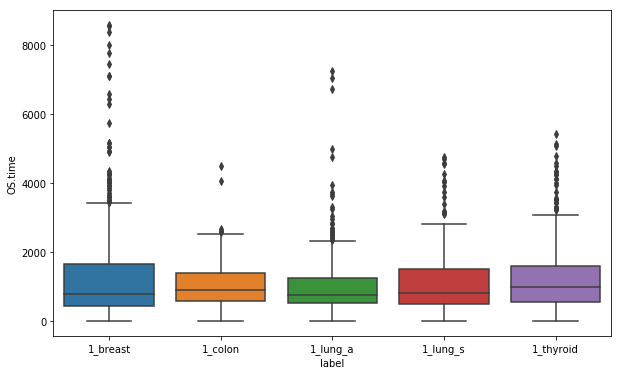

In [96]:
plt.figure(figsize=(10,6))
sns.boxplot(x="label", y="OS.time", data=top_genes_merged)
plt.show()

## Swarmplot

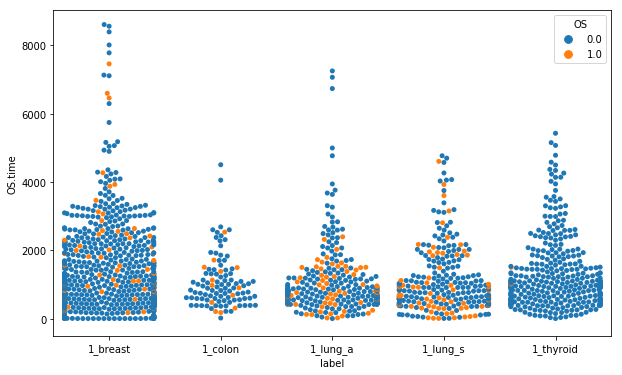

In [99]:
plt.figure(figsize=(10,6))
sns.swarmplot(x="label", y="OS.time", hue="OS", data=top_genes_merged)
plt.show()

## T-SNE Clustering

#### T-SNE function

In [129]:
def tsne_os(data_x, data_y, random_state=1888, ncols=500, perplexity=30):
        
        model = TSNE(learning_rate=20, random_state=random_state, perplexity=perplexity)
        
        transformed = model.fit_transform(data_x)

        # Plotting 2d t-SNE
        x_axis = transformed[:, 0]
        y_axis = transformed[:, 1]

        plt.figure(figsize=(16,7))
        ax1 = plt.subplot(1, 2, 1)
        sns.scatterplot(
            x=x_axis,
            y=y_axis,
            hue=data_y,
            #hue=data_x["OS"],
            #hue=data_y,
            #hue=data_x["OS.time"]
            #palette=plt.cm.get_cmap('RdBu', 20),
            #palette=sns.color_palette("hls"),
            legend="full",
            alpha=0.3,
            ax=ax1)

### T-SNE cancers/ OS.time

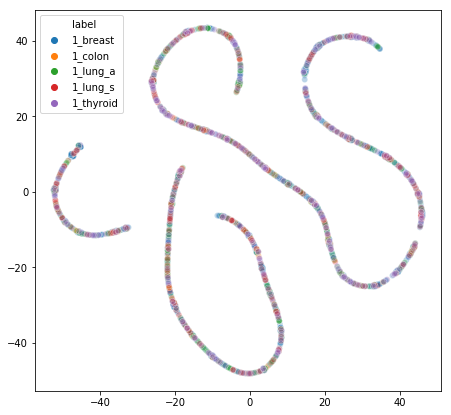

In [106]:
data_y = top_genes_merged["label"]
data_x = top_genes_merged["OS.time"].values.reshape(-1, 1)

tsne_os(data_x, data_y)

### T-SNE OS/ OS.time

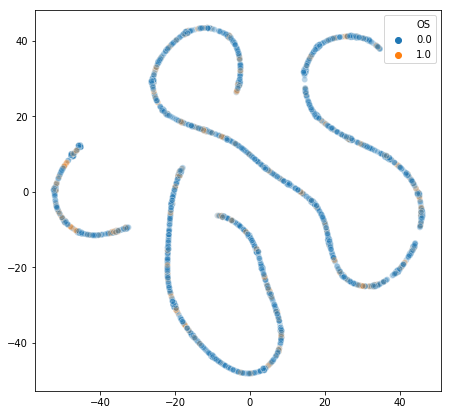

In [107]:
data_y1 = top_genes_merged["OS"]
data_x1 = top_genes_merged["OS.time"].values.reshape(-1, 1)

tsne_os(data_x1, data_y1)

### T-SNE OS/ expression

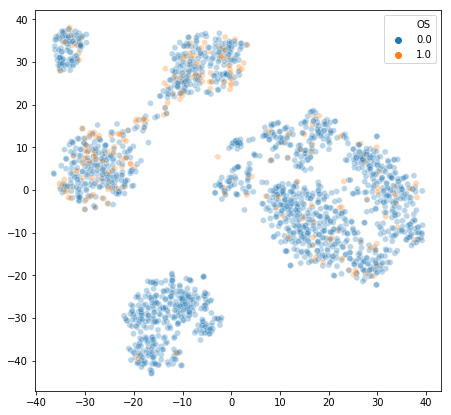

In [108]:
data_y2 = top_genes_merged["OS"]
data_x2 = top_genes_merged.drop(columns=["OS.time", "label", "OS", "sample"])

tsne_os(data_x2, data_y2)

### T-SNE OS/ OS.time + expression

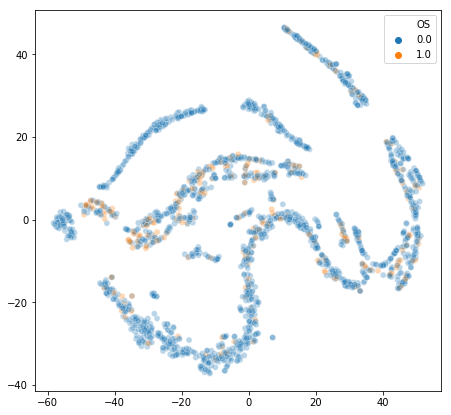

In [109]:
data_y3 = top_genes_merged["OS"]
data_x3 = top_genes_merged.drop(columns=["label", "sample", "OS"])

tsne_os(data_x3, data_y3)

### T-SNE cancers/ expression

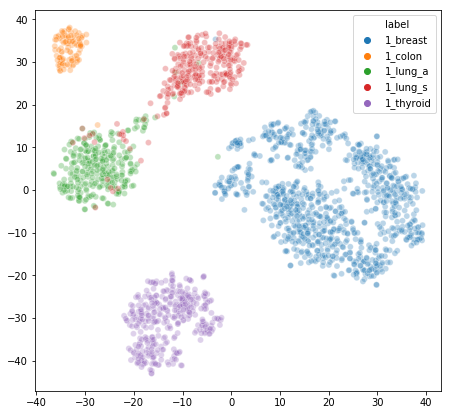

In [110]:
data_y4 = top_genes_merged["label"]
data_x4 = top_genes_merged.drop(columns=["OS.time", "label", "OS", "sample"])

tsne_os(data_x4, data_y4)

### T-SNE cancers/ OS.time + expression

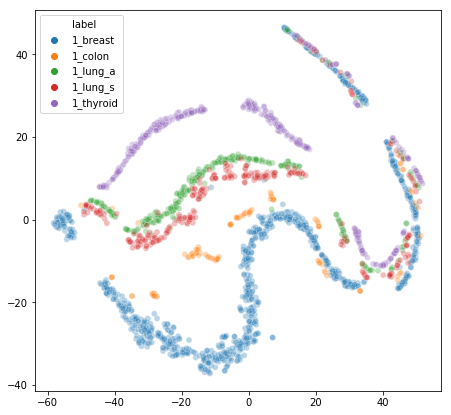

In [111]:
data_y5 = top_genes_merged["label"]
data_x5 = top_genes_merged.drop(columns=["label", "sample", "OS"])

tsne_os(data_x5, data_y5)

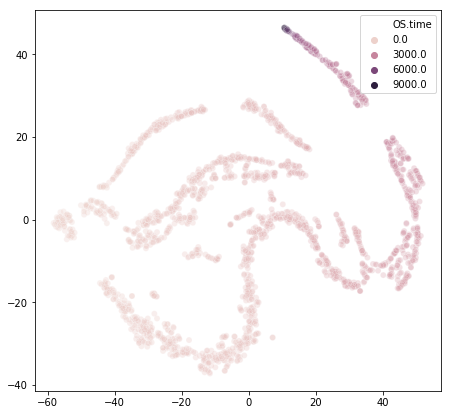

In [113]:
#hue="OS.time"

data_y15 = top_genes_merged["label"]
data_x15 = top_genes_merged.drop(columns=["label", "sample", "OS"])

tsne_os(data_x15, data_y15)

### T-SNE cancers/ OS + expression

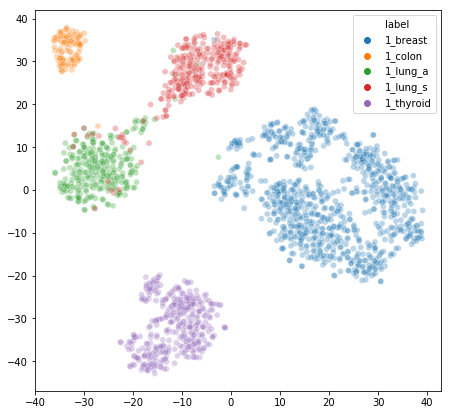

In [115]:
data_y6 = top_genes_merged["label"]
data_x6 = top_genes_merged.drop(columns=["label", "sample", "OS.time"])

tsne_os(data_x6, data_y6)

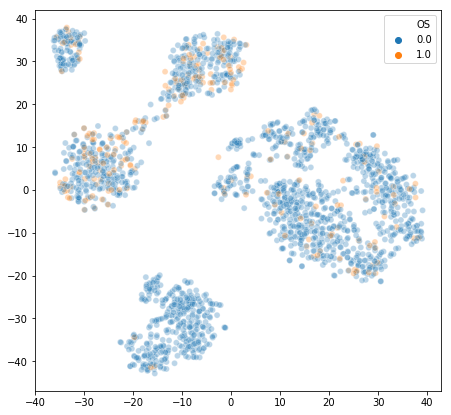

In [117]:
#hue="OS"

data_y16 = top_genes_merged["label"]
data_x16 = top_genes_merged.drop(columns=["label", "sample", "OS.time"]) #.sample(ncols, axis=1, random_state=1888)

tsne_os(data_x16, data_y16)

### T-SNE cancers/ OS + OS.time + expression

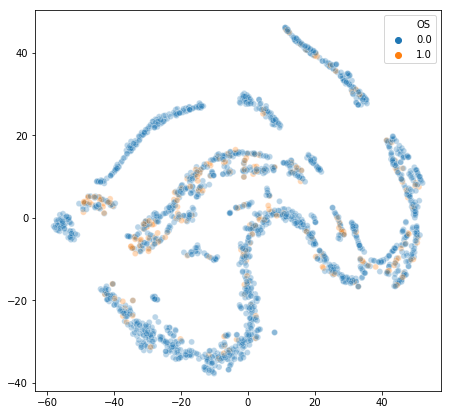

In [118]:
data_y7 = top_genes_merged["label"]
data_x7 = top_genes_merged.drop(columns=["label", "sample"]) #.sample(ncols, axis=1, random_state=1888)

tsne_os(data_x7, data_y7)

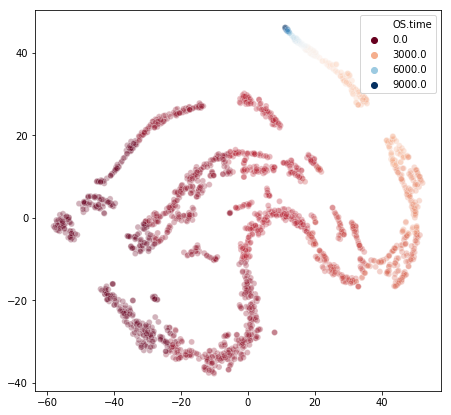

In [120]:
#hue=data_x["OS.time"]
#cmap=plt.cm.get_cmap('RdBu', 20)
#legend="brief"

data_y17 = top_genes_merged["label"]
data_x17 = top_genes_merged.drop(columns=["label", "sample"])

tsne_os(data_x17, data_y17)

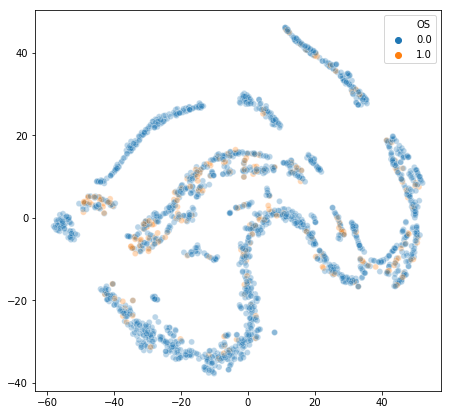

In [122]:
#hue=data_x["OS"]
#legend="brief"

data_y27 = top_genes_merged["label"]
data_x27 = top_genes_merged.drop(columns=["label", "sample"]) #.sample(ncols, axis=1, random_state=1888)

tsne_os(data_x27, data_y27)

### T-SNE OS.time/ expression

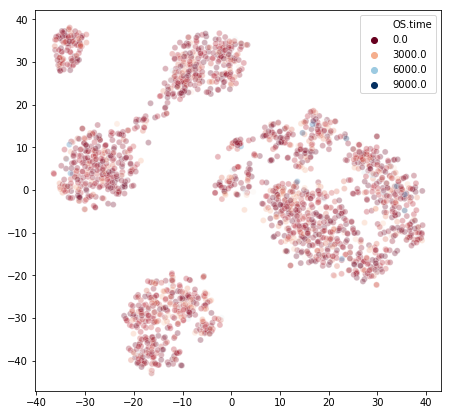

In [124]:
#cmap=plt.cm.get_cmap('RdBu', 20)
#legend="brief"

data_y8 = top_genes_merged["OS.time"]
data_x8 = top_genes_merged.drop(columns=["OS.time", "label", "OS", "sample"]) #.sample(ncols, axis=1, random_state=1888)

tsne_os(data_x8, data_y8)

### T-SNE OS.time/ OS + expression

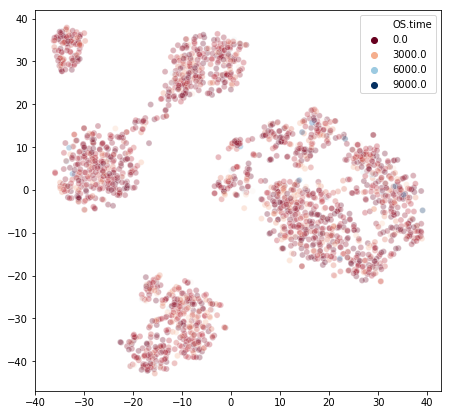

In [125]:
#cmap=plt.cm.get_cmap('RdBu', 20)
#legend="brief"

data_y9 = top_genes_merged["OS.time"]
data_x9 = top_genes_merged.drop(columns=["OS.time", "label", "sample"]) #.sample(ncols, axis=1, random_state=1888)

tsne_os(data_x9, data_y9)

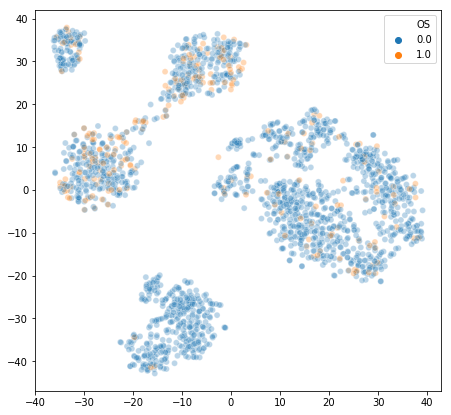

In [130]:
#hue="OS"

data_y19 = top_genes_merged["OS.time"]
data_x19 = top_genes_merged.drop(columns=["OS.time", "label", "sample"]) #.sample(ncols, axis=1, random_state=1888)

tsne_os(data_x19, data_y19)

## Kaplan Meier Plots

In [131]:
from lifelines import KaplanMeierFitter

import plotly.tools as tls  

kmf = KaplanMeierFitter()

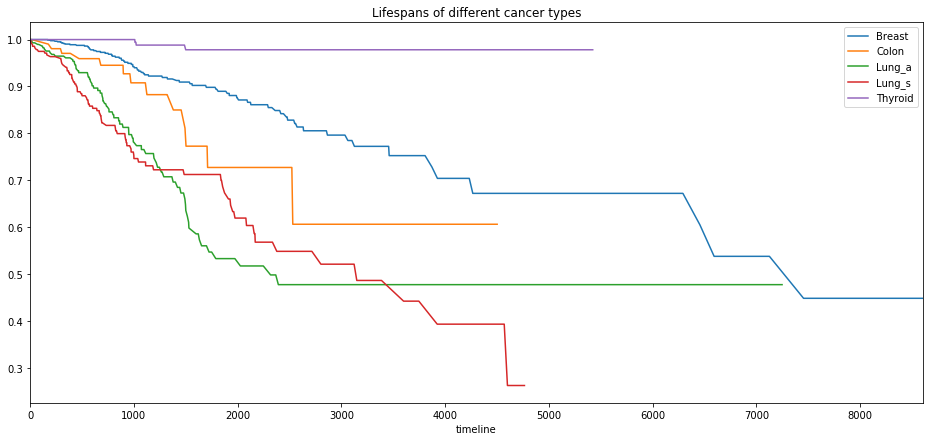

In [134]:
cancers = ["breast", "colon", "lung_a", "lung_s", "thyroid"] # skin cancer doesn't have 0S=1
    
def kaplan_plot(cancer):
    data = df_merged_filtered[df_merged_filtered["label"]=="1_" + cancer]
    T = data['OS.time']
    C = data['OS']
    ax = plt.subplot(111)
    
    fit = kmf.fit(T, event_observed=C, label=cancer.strip("_").capitalize())
    plot = kmf.survival_function_.plot(ax=ax)
    return plot

plt.figure(figsize=(16,7))
plt.title('Lifespans of different cancer types')

for cancer in cancers:
    kaplan_plot(cancer)
    
kmf_plot=plt.gcf()